In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [8]:
import cv2
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [5]:
# Set dataset path
DATASET_PATH = "A:\Infosys_Internship\Images"

In [6]:
# Image size for VGG16
IMG_SIZE = (224, 224)

In [9]:
# Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    classes = ["normal", "tumor"]  # Ensure you have subfolders named 'normal' and 'tumor'

    for label in classes:
        path = os.path.join(dataset_path, label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(0 if label == "normal" else 1)  # 0 for normal, 1 for tumor
    
    return np.array(images), np.array(labels)

In [10]:
# Load dataset
X, y = load_data(DATASET_PATH)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Load VGG16 model (without top layer for feature extraction)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 44s 1us/step


In [13]:
# Extract features using VGG16
def extract_features(model, images):
    features = model.predict(images)
    return features.reshape(features.shape[0], -1)  # Flatten

In [14]:
X_train_features = extract_features(base_model, X_train)
X_test_features = extract_features(base_model, X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [15]:
# Train SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_features, y_train)

SVC(kernel='linear', probability=True)

In [16]:
# Predict on test set
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
# Display Results
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



In [18]:
# Function to predict tumor probability on a new image
def predict_iris_tumor(image_path, model, classifier):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Extract features using VGG16
    features = extract_features(model, img_array)

    # Predict using SVM
    prediction = classifier.predict(features)
    probability = classifier.predict_proba(features)[0][1]  # Probability of having a tumor

    result = "Tumor Detected" if prediction[0] == 1 else "No Tumor"
    print(f"Prediction: {result} (Probability: {probability:.2%})")

    # Show image
    plt.imshow(img)
    plt.title(f"{result} ({probability:.2%})")
    plt.axis("off")
    plt.show()

# Example usage
# predict_iris_tumor("path_to_test_image.jpg", base_model, svm)


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

Model Accuracy: 90.91%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



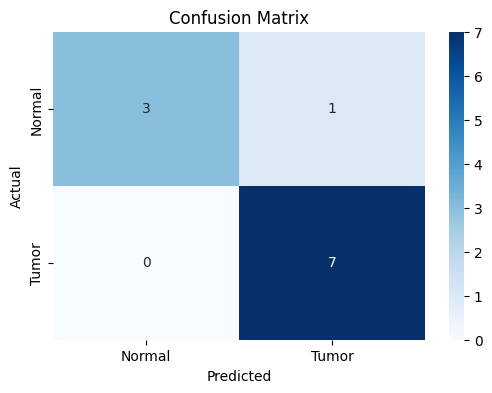

In [21]:
# Predict on the test dataset
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)

# Display Model Accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tumor"], yticklabels=["Normal", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Prediction: Tumor Detected (Probability: 98.59%)


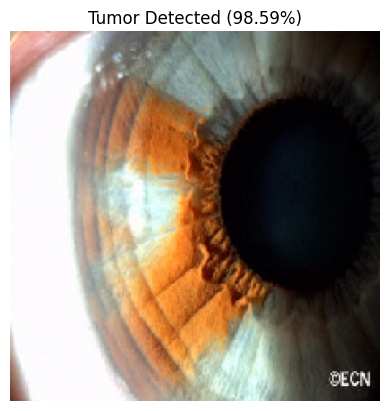

In [22]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\tumor\1.jpg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Prediction: No Tumor (Probability: 0.57%)


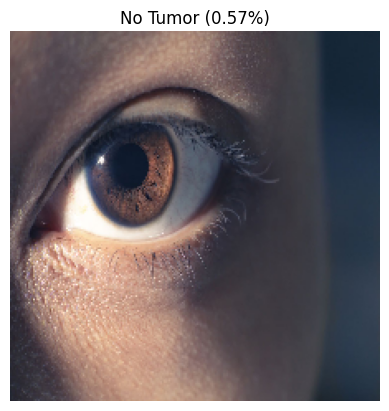

In [23]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\normal\1.jpg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
Prediction: Tumor Detected (Probability: 98.90%)


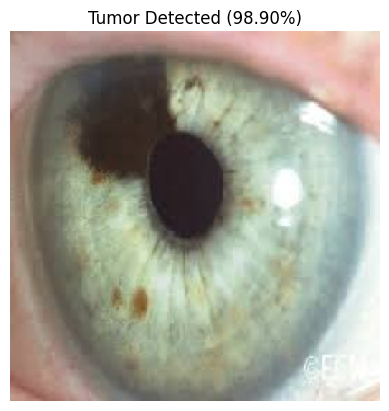

In [26]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\tumor\16.jpeg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Prediction: No Tumor (Probability: 1.70%)


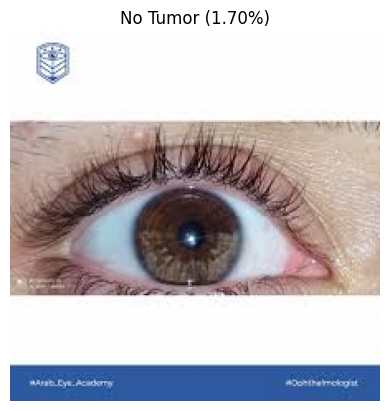

In [27]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\normal\16.jpeg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Prediction: Tumor Detected (Probability: 98.60%)


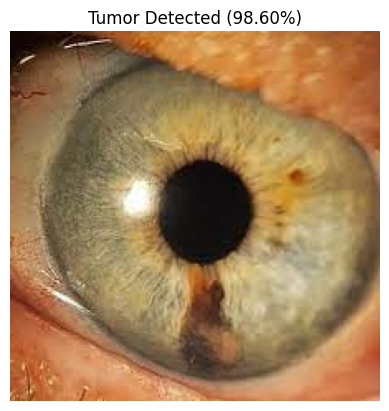

In [28]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\tumor\23.jpeg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Prediction: Tumor Detected (Probability: 98.59%)


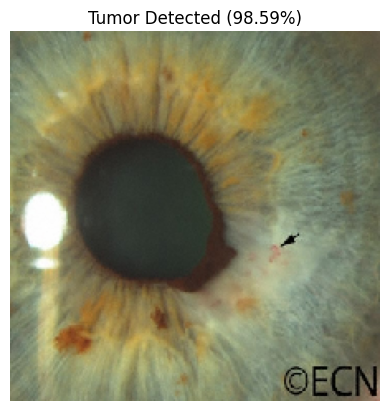

In [29]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\tumor\31.jpeg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
Prediction: Tumor Detected (Probability: 80.24%)


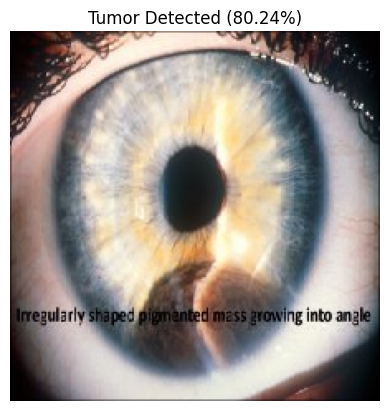

In [31]:
# Set the path of the test image
test_image_path = r"A:\Infosys_Internship\Images\tumor\36.jpg"  # Ensure the path is correct

# Run the prediction function
predict_iris_tumor(test_image_path, base_model, svm)